# Pregunta 3: Regresión lineal
---

Nombre: Cristopher Urbina H.

In [70]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
# Tema para los grafucsos
custom_params = {
    'axes.facecolor': '#1a1a1a',  # Fondo oscuro para el área de trazado
    'figure.facecolor': '#1a1a1a',  # Fondo oscuro para la figura
    'axes.labelcolor': 'white',  # Color blanco para las etiquetas de los ejes
    'xtick.color': 'white',  # Color blanco para los ticks en el eje X
    'ytick.color': 'white',  # Color blanco para los ticks en el eje Y
    'text.color': 'white',  # Color blanco para el texto en general
    'axes.grid': True,  # Activar la cuadrícula
    'grid.color': '#444444',  # Color de la cuadrícula
    'grid.linestyle': ':',  # Estilo de la cuadrícula
    'axes.edgecolor': 'white',  # Color de los bordes de los ejes
    'axes.titlecolor': 'white',  # Color blanco para el título
    'legend.facecolor': '#1a1a1a',  # Fondo oscuro para la leyenda
    'legend.edgecolor': 'white',  # Bordes blancos para la leyenda
    'legend.framealpha': 0.7,  # Transparencia del fondo de la leyenda
    'font.family': 'sans-serif',  # Fuente sans-serif
}

# Aplicar el tema usando Seaborn
sns.set_theme(
    context='talk',
    style='darkgrid',  # Puedes cambiar a 'dark', 'whitegrid', etc.
    palette='Purples_r',
    rc=custom_params
)

# Lectura de datos

In [10]:
    df = pd.read_json("data_p3/Gift_Cards.jsonl", lines = True)
    df = df.sample(frac=0.2, random_state=203975457)
    df.info()
    display(df.describe())
    df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 30482 entries, 60810 to 24502
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rating             30482 non-null  int64         
 1   title              30482 non-null  object        
 2   text               30482 non-null  object        
 3   images             30482 non-null  object        
 4   asin               30482 non-null  object        
 5   parent_asin        30482 non-null  object        
 6   user_id            30482 non-null  object        
 7   timestamp          30482 non-null  datetime64[ns]
 8   helpful_vote       30482 non-null  int64         
 9   verified_purchase  30482 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 2.4+ MB


,rating,timestamp,helpful_vote
count,30482.000000,30482,30482.000000
mean,4.561216,2019-01-12 21:44:19.731726848,0.861919
min,1.000000,2008-08-09 01:43:20,0.000000
25%,5.000000,2017-01-31 12:08:13.500000,0.000000
50%,5.000000,2019-02-06 01:36:14.773500160,0.000000
75%,5.000000,2021-01-16 21:48:04.402249984,0.000000
max,5.000000,2023-09-04 21:33:01.705000,4536.000000
std,1.146273,NaN,28.899798


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
60810,5,Good,Worked great! Love their food!!,[],B01GKZ3F64,B00CXZPEPG,AEOOL24LQGRZ3C7CFT6B67QXUFBA,2020-03-02 17:25:46.557,0,True
42114,5,Free Money,I was about to spend 100$ and saw that I can g...,[],B00IX1I3G6,B00IX1I3G6,AGRVXMR2Y66RENIRRK5IFANPAQLA,2021-05-04 18:09:41.837,0,True
29206,5,apple with 10% discount,10% discount. can't go wrong,[],B00KV30IHG,B00KV30IHG,AGLVBAMX7JOGU6FK6QWZY2YNHAMA,2017-12-10 13:42:01.548,0,True
33275,5,Exactly what you’d expect.,"Got this on a discount, which is very nice.",[],B00OOKDO4Q,B00OOKDO4Q,AF7MHTVCPF3TSL6QGLFZKKBN36JQ,2020-01-12 00:36:58.294,0,True
84183,5,Great for gift giving,Exactly what you'd expect. Great for gift giving.,[],B0176W9Q9U,B0176W9Q9U,AE3WYI36GJJQZH7RYQTFLA36DUDQ,2016-02-02 01:45:00.000,0,True


In [33]:
df['length_of_review'] = df['text'].apply(lambda x: len(x.split()))
df['verified_purchase'] = df['verified_purchase'].apply(lambda x: 1 if x == True else 0)
df[['verified_purchase','helpful_vote','length_of_review']]

,verified_purchase,helpful_vote,length_of_review
60810,1,0,5
42114,1,0,26
29206,1,0,5
33275,1,0,9
84183,1,0,8
...,...,...,...
129202,1,2,78
75669,1,0,3
122969,1,0,4
68594,1,1,51


> - [X] Creación de columna, y conversion de columnas a numericas

# Distribución de ratings (P3.b)

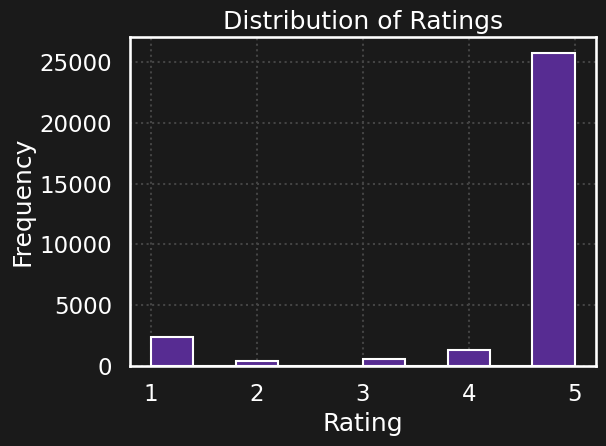

In [81]:
import os 
df.rating.hist()

plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.tight_layout()

os.mkdir("informe/figures")
plt.savefig("informe/figures/distribucion_rating.png")
plt.show()

> La mayor parte de las reviews son 5 estrellas.

# División en conjunto de entrenamiento y prueba (P3.c)

In [82]:
train = df.sample(frac=0.9, random_state=203975457)
test = df.drop(train.index)

In [39]:
X = df[['verified_purchase','helpful_vote','length_of_review']].to_numpy()
y = df['rating'].to_numpy()
print('Matriz de caracteristicas:\n',X)
print('Matriz de etiquetas:\n',y)

Matriz de caracteristicas:
 [[ 1  0  5]
 [ 1  0 26]
 [ 1  0  5]
 ...
 [ 1  0  4]
 [ 1  1 51]
 [ 1  0 17]]
Matriz de etiquetas:
 [5 5 5 ... 5 5 5]


## Implementación clase `LinearRegression`

In [106]:
class LinearRegression:
    def __init__(self, features, labels):
        self.X = self.X = np.c_[np.ones((features.shape[0], 1)), features.to_numpy()]
        self.y = labels.to_numpy()
        self.theta = None
    def fit(self):
        self.theta = np.linalg.inv(self.X.T.dot(self.X)).dot(self.X.T.dot(self.y)) 
    def predict(self, X_new):
        X_new_b = np.c_[np.ones((X_new.shape[0], 1)), X_new]
        return X_new_b.dot(self.theta)

In [85]:
model = LinearRegression(train[['verified_purchase','helpful_vote','length_of_review']],train['rating'] )
model.fit()
print("Estimadores:",model.theta)

Estimadores: [ 4.22150069e+00  5.97223125e-01  1.42682585e-04 -1.36997229e-02]


> El primer termino corresponde al intercepto, lo cual nos dice que si todas las variables son 0 el rating por defecto toma ese valor, lo que hace cierto sentido viendo la distribución de este. El segundo termino corresponde a `verified_purchase`, y se interpreta como cada compra verificada tiene un incremento de medio punto en su rating. El tercer termino tiene un valor aproximado de 0.00014, lo que quiere decir que si la review es `helpful_vote` entonces incrementa en dicha cantidad su rating. Por último, a mayor largo de la review menor rating, en concreto, por cada unidad de aumento en el largo de ls review su rating disminuye en 0.014 aproximadamente.

In [86]:
def MSE(predicts, labels):
    error = predicts - labels
    squared_error = error ** 2
    mean_squared_error = np.mean(squared_error)
    return mean_squared_error

In [88]:
predicts_test = model.predict(test[['verified_purchase','helpful_vote','length_of_review']])
predicts_train = model.predict(train[['verified_purchase','helpful_vote','length_of_review']])

mse_train = MSE(predicts_train, train['rating'])
mse_test = MSE(predicts_test, test['rating'])

print("MSE en entrenamiento:",mse_train)
print("MSE en test:",mse_test)

MSE en entrenamiento: 1.1588340479105994
MSE en test: 1.1480894117728742


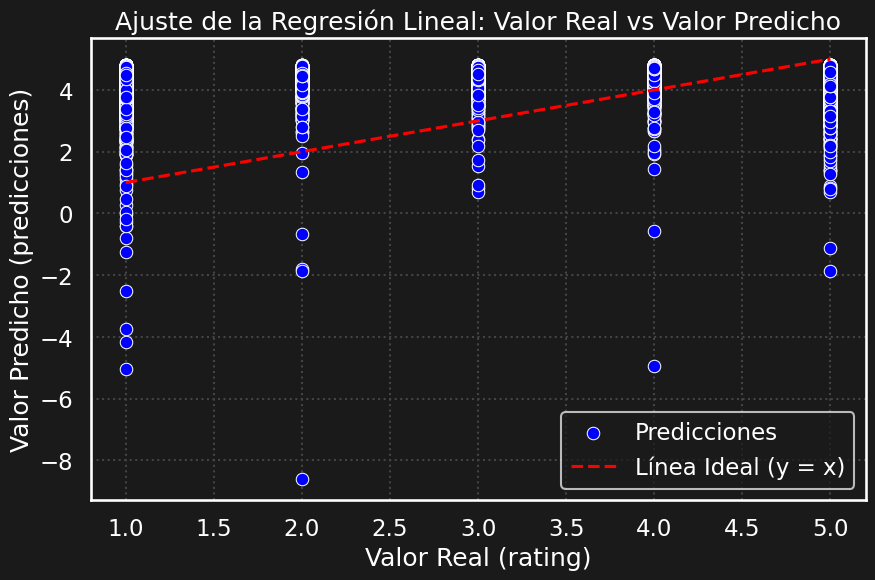

In [113]:
# Graficar los valores reales de 'rating' vs las predicciones
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['rating'], y=predictiones, label='Predicciones', color='blue')
sns.lineplot(x=[df['rating'].min(), df['rating'].max()], 
             y=[df['rating'].min(), df['rating'].max()], 
             label='Línea Ideal (y = x)', color='red', linestyle='--')

plt.xlabel('Valor Real (rating)')
plt.ylabel('Valor Predicho (predicciones)')
plt.title('Ajuste de la Regresión Lineal: Valor Real vs Valor Predicho')
plt.legend()
plt.savefig("informe/figures/ajuste_regresion.png")
plt.show()

# Ridge y Lasso regression (P3.d)

In [89]:
from sklearn.linear_model import Lasso, Ridge

In [116]:
X_train = train[['verified_purchase','helpful_vote','length_of_review']]
y_train = train['rating']

X_test = test[['verified_purchase','helpful_vote','length_of_review']]
y_test = test['rating']

In [117]:
# Valores para ρ (alpha)
alphas = np.logspace(-4, 4, 100)

# Inicializar listas para almacenar resultados
mse_train_lasso = []
mse_test_lasso = []
mse_train_ridge = []
mse_test_ridge = []
norms_lasso = []
norms_ridge = []

for alpha in alphas:
    # Ajustar LASSO
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    
    # Hacer predicciones
    y_train_pred_lasso = lasso.predict(X_train)
    y_test_pred_lasso = lasso.predict(X_test)
    
    # Guardar resultados
    mse_train_lasso.append(MSE(y_train, y_train_pred_lasso))
    mse_test_lasso.append(MSE(y_test, y_test_pred_lasso))
    norms_lasso.append(np.linalg.norm(lasso.coef_))
    
    # Ajustar Ridge
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    
    # Hacer predicciones
    y_train_pred_ridge = ridge.predict(X_train)
    y_test_pred_ridge = ridge.predict(X_test)
    
    # Guardar resultados
    mse_train_ridge.append(MSE(y_train, y_train_pred_ridge))
    mse_test_ridge.append(MSE(y_test, y_test_pred_ridge))
    norms_ridge.append(np.linalg.norm(ridge.coef_))


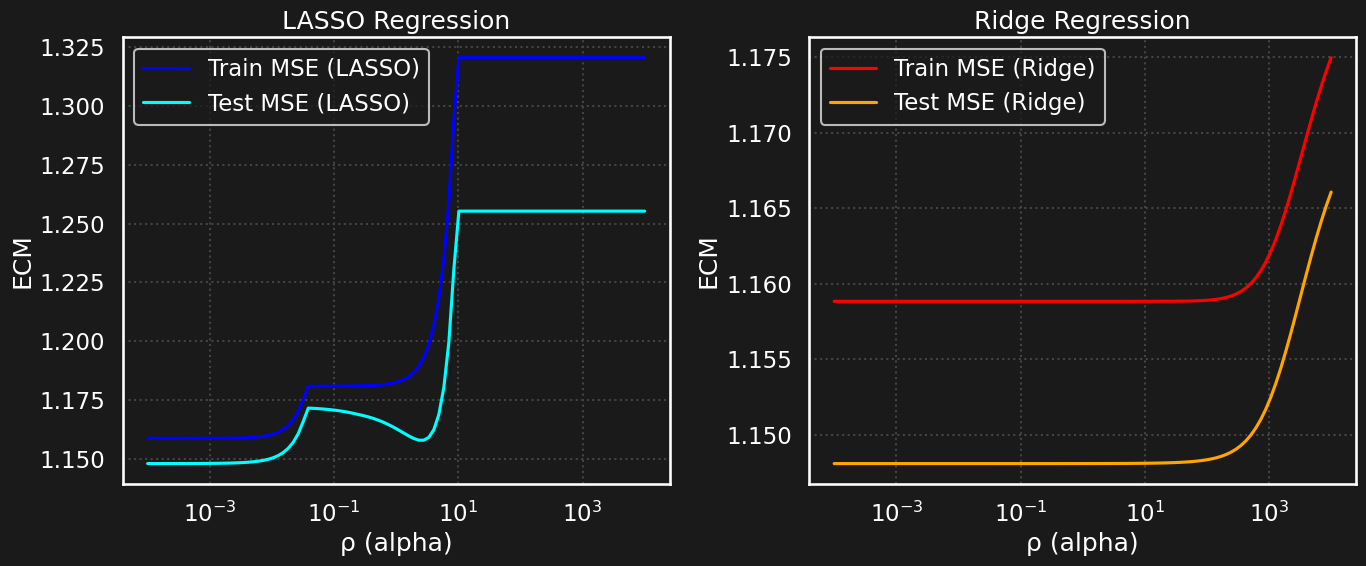

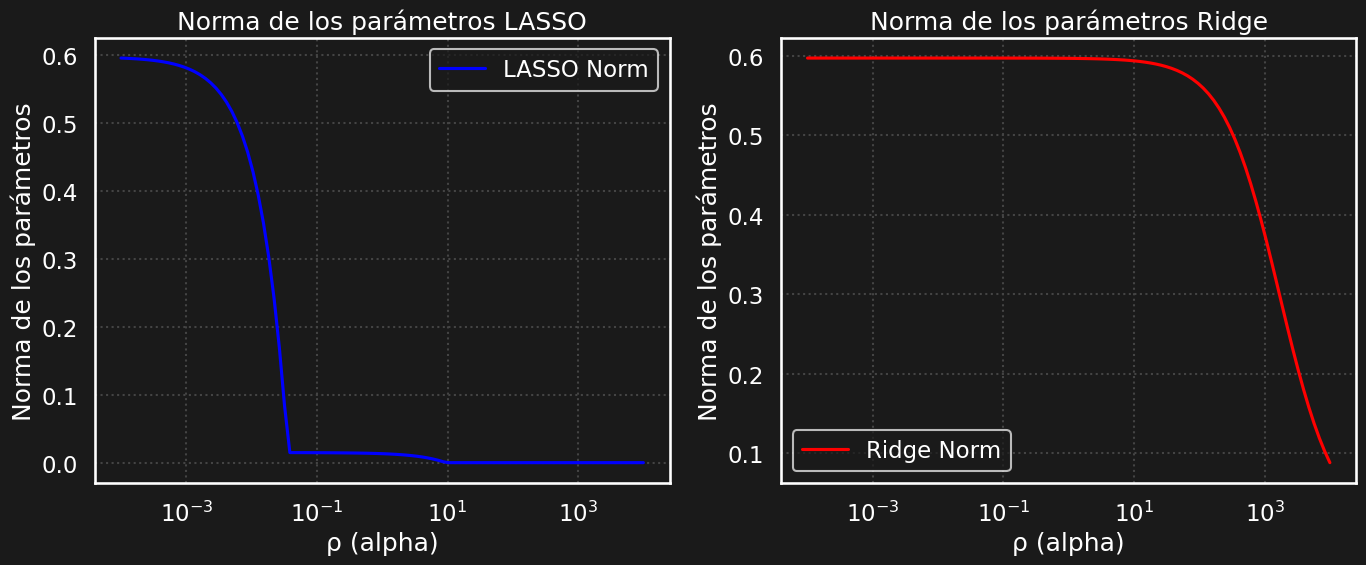

In [118]:
# Graficar ECM
plt.figure(figsize=(14, 6))

# ECM para LASSO
plt.subplot(1, 2, 1)
plt.plot(alphas, mse_train_lasso, label='Train MSE (LASSO)', color='blue')
plt.plot(alphas, mse_test_lasso, label='Test MSE (LASSO)', color='cyan')
plt.xscale('log')
plt.xlabel('ρ (alpha)')
plt.ylabel('ECM')
plt.title('LASSO Regression')
plt.legend()

# ECM para Ridge
plt.subplot(1, 2, 2)
plt.plot(alphas, mse_train_ridge, label='Train MSE (Ridge)', color='red')
plt.plot(alphas, mse_test_ridge, label='Test MSE (Ridge)', color='orange')
plt.xscale('log')
plt.xlabel('ρ (alpha)')
plt.ylabel('ECM')
plt.title('Ridge Regression')
plt.legend()

plt.tight_layout()
plt.savefig("informe/figures/ecm_sin_escalado.png")
plt.show()

# Graficar normas de los parámetros
plt.figure(figsize=(14, 6))

# Norma de los parámetros para LASSO
plt.subplot(1, 2, 1)
plt.plot(alphas, norms_lasso, label='LASSO Norm', color='blue')
plt.xscale('log')
plt.xlabel('ρ (alpha)')
plt.ylabel('Norma de los parámetros')
plt.title('Norma de los parámetros LASSO')
plt.legend()

# Norma de los parámetros para Ridge
plt.subplot(1, 2, 2)
plt.plot(alphas, norms_ridge, label='Ridge Norm', color='red')
plt.xscale('log')
plt.xlabel('ρ (alpha)')
plt.ylabel('Norma de los parámetros')
plt.title('Norma de los parámetros Ridge')
plt.legend()

plt.tight_layout()
plt.savefig("informe/figures/parametros_sin_escalado.png")
plt.show()


# Escalando los datos (P3.e)

In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(train[['verified_purchase','helpful_vote','length_of_review']])
y_train = train['rating']

X_test = scaler.fit_transform(test[['verified_purchase','helpful_vote','length_of_review']])
y_test = test['rating']

In [98]:
# Valores para ρ (alpha)
alphas = np.logspace(-4, 4, 100)

# Inicializar listas para almacenar resultados
mse_train_lasso = []
mse_test_lasso = []
mse_train_ridge = []
mse_test_ridge = []
norms_lasso = []
norms_ridge = []

for alpha in alphas:
    # Ajustar LASSO
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    
    # Hacer predicciones
    y_train_pred_lasso = lasso.predict(X_train)
    y_test_pred_lasso = lasso.predict(X_test)
    
    # Guardar resultados
    mse_train_lasso.append(MSE(y_train, y_train_pred_lasso))
    mse_test_lasso.append(MSE(y_test, y_test_pred_lasso))
    norms_lasso.append(np.linalg.norm(lasso.coef_))
    
    # Ajustar Ridge
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    
    # Hacer predicciones
    y_train_pred_ridge = ridge.predict(X_train)
    y_test_pred_ridge = ridge.predict(X_test)
    
    # Guardar resultados
    mse_train_ridge.append(MSE(y_train, y_train_pred_ridge))
    mse_test_ridge.append(MSE(y_test, y_test_pred_ridge))
    norms_ridge.append(np.linalg.norm(ridge.coef_))

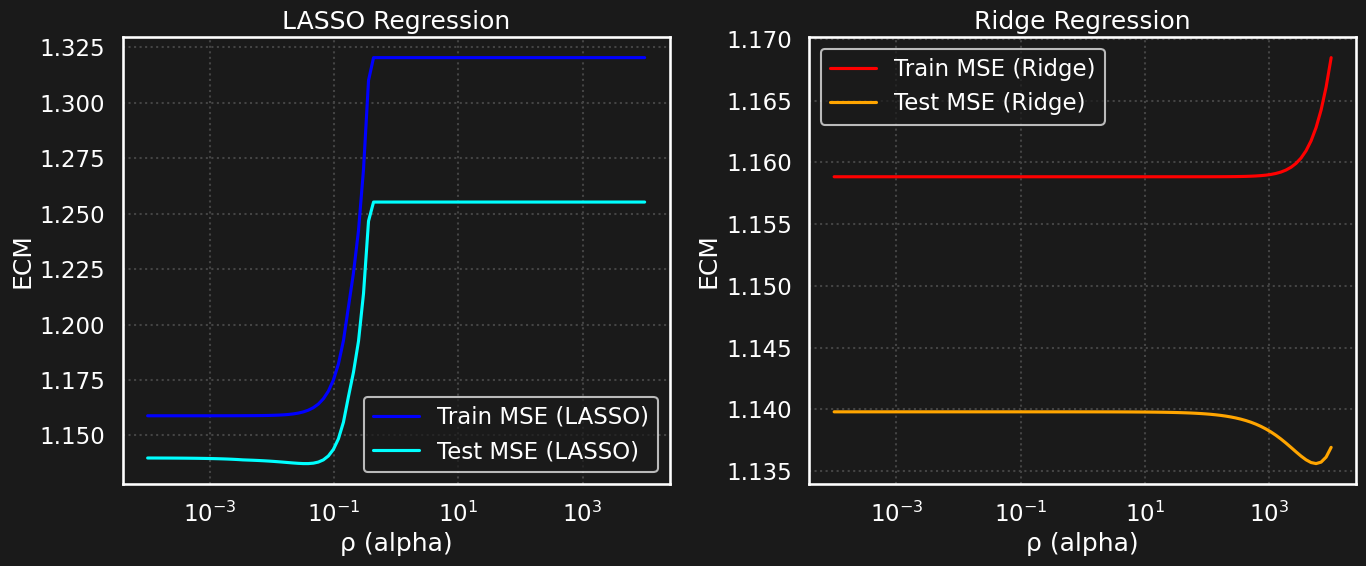

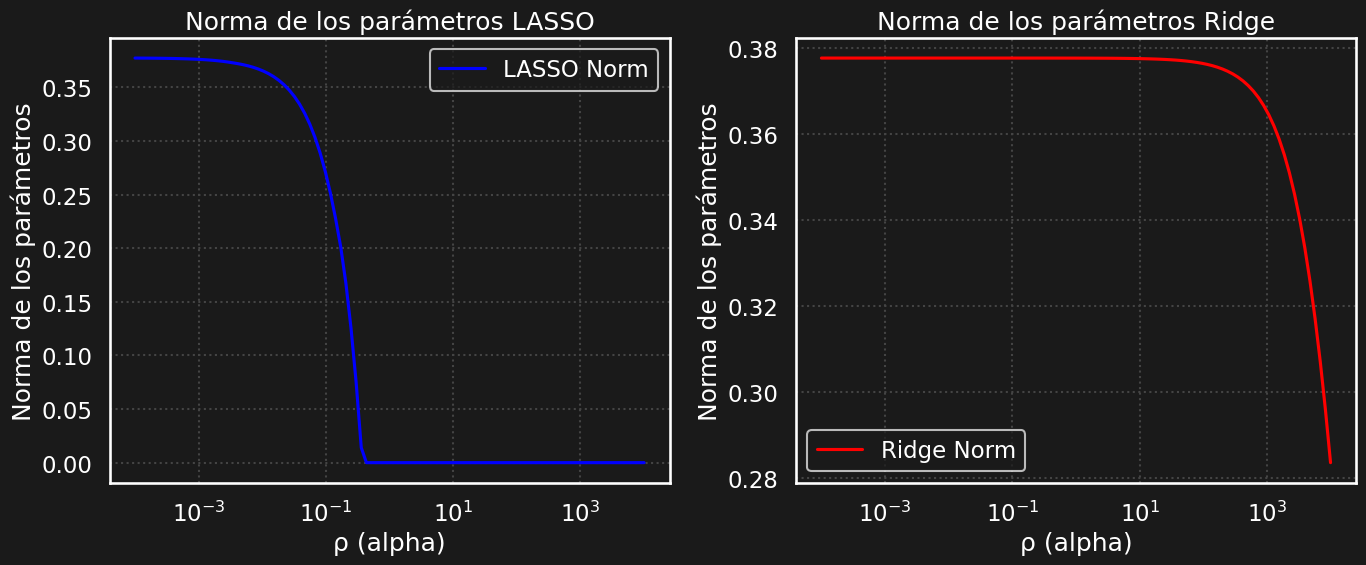

In [115]:
# Graficar ECM
plt.figure(figsize=(14, 6))

# ECM para LASSO
plt.subplot(1, 2, 1)
plt.plot(alphas, mse_train_lasso, label='Train MSE (LASSO)', color='blue')
plt.plot(alphas, mse_test_lasso, label='Test MSE (LASSO)', color='cyan')
plt.xscale('log')
plt.xlabel('ρ (alpha)')
plt.ylabel('ECM')
plt.title('LASSO Regression')
plt.legend()

# ECM para Ridge
plt.subplot(1, 2, 2)
plt.plot(alphas, mse_train_ridge, label='Train MSE (Ridge)', color='red')
plt.plot(alphas, mse_test_ridge, label='Test MSE (Ridge)', color='orange')
plt.xscale('log')
plt.xlabel('ρ (alpha)')
plt.ylabel('ECM')
plt.title('Ridge Regression')
plt.legend()

plt.tight_layout()
plt.savefig("informe/figures/ecm_con_escalado")
plt.show()

# Graficar normas de los parámetros
plt.figure(figsize=(14, 6))

# Norma de los parámetros para LASSO
plt.subplot(1, 2, 1)
plt.plot(alphas, norms_lasso, label='LASSO Norm', color='blue')
plt.xscale('log')
plt.xlabel('ρ (alpha)')
plt.ylabel('Norma de los parámetros')
plt.title('Norma de los parámetros LASSO')
plt.legend()

# Norma de los parámetros para Ridge
plt.subplot(1, 2, 2)
plt.plot(alphas, norms_ridge, label='Ridge Norm', color='red')
plt.xscale('log')
plt.xlabel('ρ (alpha)')
plt.ylabel('Norma de los parámetros')
plt.title('Norma de los parámetros Ridge')
plt.legend()

plt.tight_layout()
plt.savefig("informe/figures/parametros_con_escalado.png")
plt.show()


> Las metricas calculadas son comparables, ya que los estimadores estan estimando caracteristicas en la misma escala. Además se puede observar una disminucion en la norma de los parametros producto de esto, luego se ven curvas mucho más suaves, incluso en el caso de ridge se ve una mejora en los valores de errores a mayor valor de $\rho$. Ridge generaliza mejor en terminos de error a observaciones fuera de muestra.

In [109]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [110]:
degree = 3
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Ajustar el modelo de regresión lineal con características polinómicas
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Hacer predicciones
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Calcular ECM
mse_train = MSE(y_train, y_train_pred)
mse_test = MSE(y_test, y_test_pred)

# Reportar ECM
print(f'ECM en el conjunto de entrenamiento: {mse_train:.3f}')
print(f'ECM en el conjunto de prueba: {mse_test:.3f}')


ECM en el conjunto de entrenamiento: 1.111
ECM en el conjunto de prueba: 1.142


> De todos los metodos, basadome en resultados, recomendaria una implementación de regresion Ridge con caracteristicas escaladas, ya que demostro dar unos resultados muy buenos en el conjunto de test, dando a entender que resulta un muy buen modelo para generalizar a observaciones fuera de muestra.